# Project: Investigating TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For my project i chose to work on TMDB Movies Dataset, which is an extracted sample from the The Movie DataBase (TMDB) that comprises of 10,000 movies with their ratings, revenues, cast, etc.

> I believe this to be a very interesting dataset as i expect there to be a correlation between rating and multiple aspects that differ from movie to movie.

> My goal in investigating this dataset would be to find out those patterns that make the best rated movies and the most revenues.

> The output of this research is very pivotal as several production companies spend millions of dollars on movies that they expect to skyrocket that end up floping instead.

In [410]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

first we will start by loading the dataset:
### General Properties

In [212]:
Mv_db = pd.read_csv('tmdb-movies.csv')
Mv_db.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [213]:
Mv_db.info() # 10866 records, 21 columns before cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning 

> Removing duplications

In [214]:
Mv_db.duplicated()                      # Only 1 Duplicate Found
Mv_db.drop_duplicates(inplace = True)   # 1 Duplicate Droped

> Accounting for Nulls

In [215]:
Mv_db.isnull().all()                    # No Empty Rows Found but will need to correct for nulls in rows

# Dropping columns that aren't needed for analysis or that have more null data than to be accurate
Mv_db.drop(columns = ['id','imdb_id','homepage','tagline','overview','keywords','production_companies','budget_adj','revenue_adj']
           , inplace = True)
# After dropping these columns we have 12 columns in DataFrame instead of 21

# Now after removing the columns with lots of Nulls, we can drop remaining nulls without losing significant amounts of Data
Mv_db.dropna(inplace = True) 

> Checking The DataFrame after Cleaning the un-necessary and corrupt Data

In [216]:
Mv_db.shape # Shape of DF after cleaning is 12 columns with 10731 records 

(10731, 12)

> Now we shall correct datatypes

In [282]:
Mv_db.dtypes # After checking the datatypes we notice the following

# Release Date needs to be changed from String to Datetime
Mv_db['release_date'] = pd.to_datetime(Mv_db['release_date'])

# popularity needs to be changed from Float to Int
Mv_db['popularity']= Mv_db['popularity'].astype(int)

# Converting Genres into a List for each Movie
Mv_db['top_genre']= Mv_db['genres'].apply(lambda x:x[0])
Mv_db['genres']= Mv_db['genres'].apply(lambda x:x.split('|'))


# Cast column used to select only Star Actor and Converting Cast into Cast List
Mv_db['star_actor']= Mv_db['cast'].apply(lambda x:x.split('|')[0])
Mv_db['cast']= Mv_db['cast'].apply(lambda x:x.split('|'))

AttributeError: 'list' object has no attribute 'split'

> Created a column to count Number of Actors in the cast of the Movie

In [220]:
out = []
i=0
j=len(Mv_db)
while(i<j):
    a = len(Mv_db.iloc[i]['cast'])
    i=i+1
    out.append(a)
Mv_db['cast_count'] = out

In [225]:
Mv_db.head()  # The final Shape for the Table after cleaning and filtering with 14 columns

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,star_actor,cast_count
0,32,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,Chris Pratt,5
1,28,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,Tom Hardy,5
2,13,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,Shailene Woodley,5
3,11,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",2015-12-15,5292,7.5,2015,Harrison Ford,5
4,9,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]",2015-04-01,2947,7.3,2015,Vin Diesel,5


<a id='eda'></a>
## Exploratory Data Analysis




### What are The Correlations between the data of the Movies and their distributions ?

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='budget', ylabel='popularity'>,
        <AxesSubplot:xlabel='revenue', ylabel='popularity'>,
        <AxesSubplot:xlabel='runtime', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_count', ylabel='popularity'>,
        <AxesSubplot:xlabel='vote_average', ylabel='popularity'>,
        <AxesSubplot:xlabel='release_year', ylabel='popularity'>,
        <AxesSubplot:xlabel='cast_count', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='budget'>,
        <AxesSubplot:xlabel='budget', ylabel='budget'>,
        <AxesSubplot:xlabel='revenue', ylabel='budget'>,
        <AxesSubplot:xlabel='runtime', ylabel='budget'>,
        <AxesSubplot:xlabel='vote_count', ylabel='budget'>,
        <AxesSubplot:xlabel='vote_average', ylabel='budget'>,
        <AxesSubplot:xlabel='release_year', ylabel='budget'>,
        <AxesSubplot:xlabel='cast_count', ylabel='budget'>],
       [<AxesSubpl

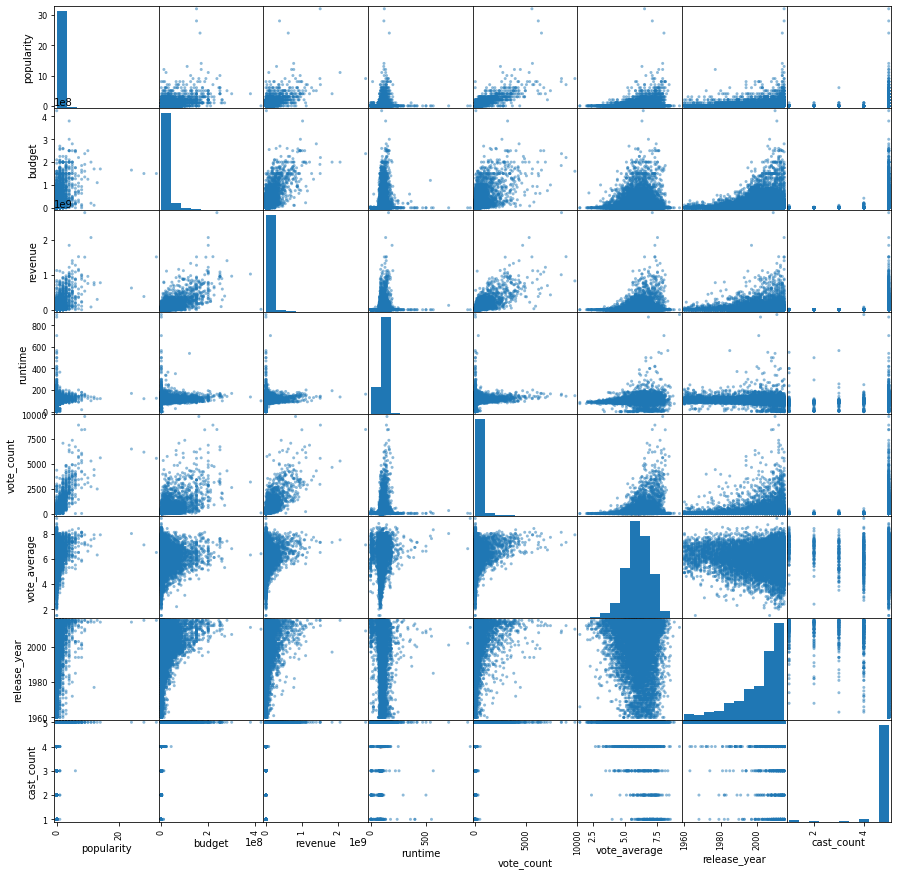

In [254]:
pd.plotting.scatter_matrix(Mv_db,figsize=(15,15))

### How much are the Statistical Summaries for this Data ?

In [260]:
Mv_db.describe().iloc[:,:6]

,popularity,budget,revenue,runtime,vote_count,vote_average
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000
mean,0.280216,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710
std,0.959205,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283
min,0.000000,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000
25%,0.000000,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000
50%,0.000000,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000
75%,0.000000,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000
max,32.000000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000


### Does having high rating necessarily translate into success in terms of Revenue ?

Text(0, 0.5, 'Revenue')

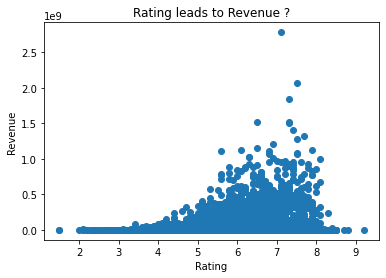

In [265]:
plt.scatter(x=Mv_db['vote_average'],y=Mv_db['revenue'])
plt.title('Rating leads to Revenue ?')
plt.xlabel('Rating')
plt.ylabel('Revenue')

### Do high Budget Movies generate more Revenue ?

Text(0, 0.5, 'Revenue')

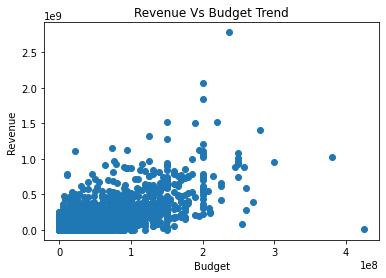

In [349]:
plt.scatter(x=Mv_db['budget'],y=Mv_db['revenue'])
plt.title('Revenue Vs Budget Trend')
plt.xlabel('Budget')
plt.ylabel('Revenue')

### What is the most common Top Genre in the DS?

<AxesSubplot:>

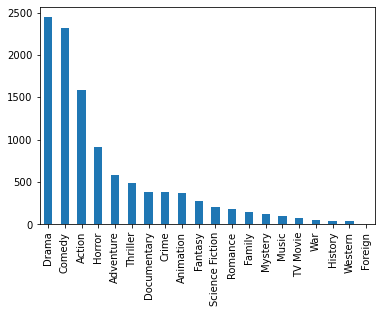

In [345]:
Mv_db['top_genre'].value_counts().plot(kind='bar')

### How Many of these movies had a Certain Star Actor ?

Text(0, 0.5, 'No. of Staring Movies')

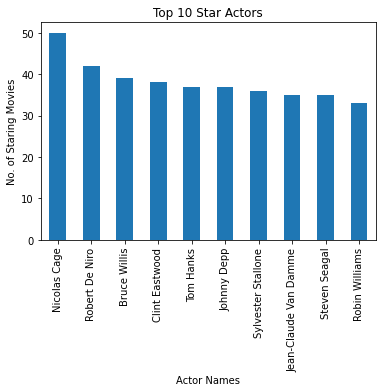

In [250]:
# TOP 10 Actors by Number of Movies that they Starred-in 
Mv_db['star_actor'].value_counts().iloc[:10].plot(kind='bar')
plt.title('Top 10 Star Actors')
plt.xlabel('Actor Names')
plt.ylabel('No. of Staring Movies')

### What are the Best 10 performing Movie Titles ?

Text(0, 0.5, 'Revenue')

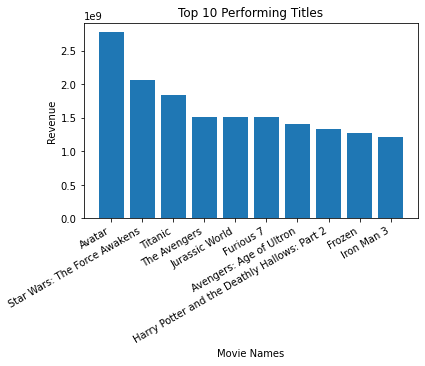

In [409]:
top_titles = Mv_db.sort_values('revenue',ascending=False).iloc[:10]
fig, ax = plt.subplots()
plt.bar(top_titles['original_title'],top_titles['revenue'],align='center')
fig.autofmt_xdate()
plt.title('Top 10 Performing Titles')
plt.xlabel('Movie Names')
plt.ylabel('Revenue')

### What are the Top Rated Genres ?

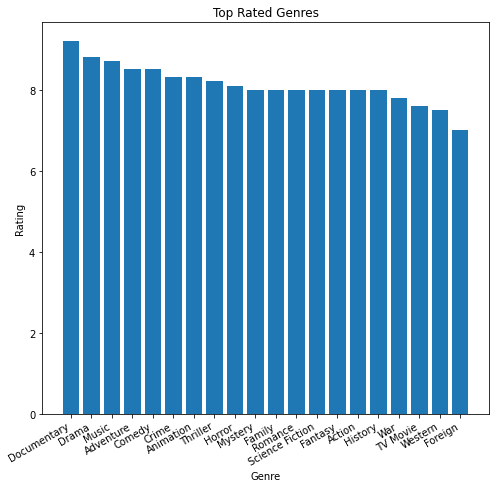

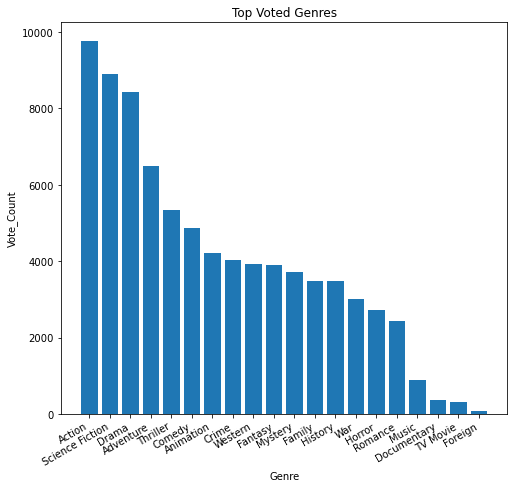

In [446]:
# Top Rated Genre
top_genres = Mv_db.sort_values('vote_average',ascending=False)
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(top_genres['top_genre'],top_genres['vote_average'],align='center')
fig.autofmt_xdate()
plt.title('Top Rated Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

# Top Voted Genre
top_genres2 = Mv_db.sort_values('vote_count',ascending=False)
fig2, ax = plt.subplots(figsize=(8,8))
plt.bar(top_genres2['top_genre'],top_genres2['vote_count'],align='center')
fig2.autofmt_xdate()
plt.title('Top Voted Genres')
plt.xlabel('Genre')
plt.ylabel('Vote_Count')
plt.show()

### Who are the Top Rated Movies ?

Text(0, 0.5, 'Rating')

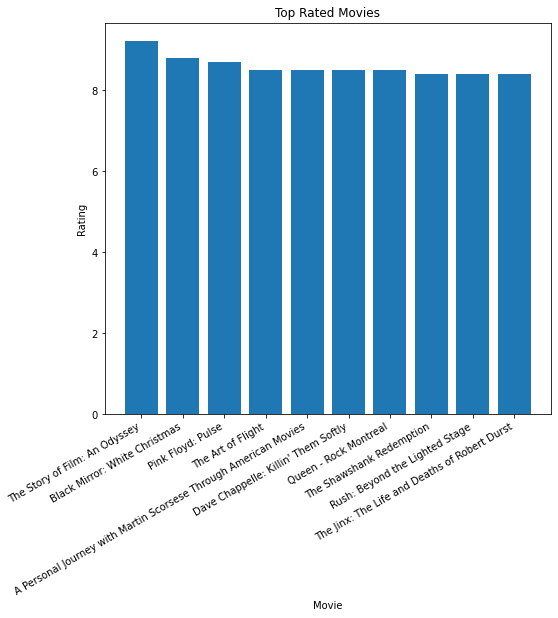

In [437]:
top_genres = Mv_db.sort_values('vote_average',ascending=False).iloc[:10]
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(top_genres['original_title'],top_genres['vote_average'],align='center')
fig.autofmt_xdate()
plt.title('Top Rated Movies')
plt.xlabel('Movie')
plt.ylabel('Rating')

### Who are the Directors associated with best Rated Movies ?

Text(0, 0.5, 'Rating')

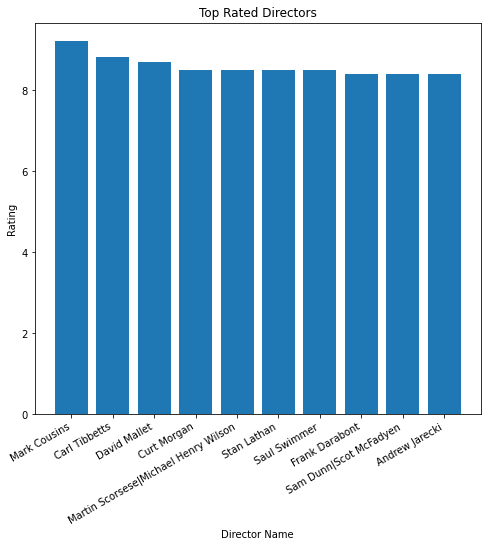

In [435]:
top_genres = Mv_db.sort_values('vote_average',ascending=False).iloc[:10]
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(top_genres['director'],top_genres['vote_average'],align='center')
fig.autofmt_xdate()
plt.title('Top Rated Directors')
plt.xlabel('Director Name')
plt.ylabel('Rating')

<a id='conclusions'></a>
## Conclusions

> After Manipulating and Exploring the data, I found out that movie ratings depend on alot of attributes to a movie like Director, Starring Actors, Budget spent on that movie and Genre.

> Also i found out that movies with a bigger budget generally tend to be better rated and generate more revenues due to the fact that they have high production capabilities.

> Some of the cool interesting facts that i got to discover were the Top rated movie of all time which was "The Story of Film: An Odyssey" and that the Movie with the highest Revenue of all time was "Avatar".

> I got to know that the movie star with the most amount of movies in this dataset was Nicolas Cage, then Robbert De Niro and then Bruce Willis which are all known and pioneering actors.

> I also found out some interesting information like: knowing that Movies that are highly popular are not necessarily higher rated than ones that aren't, this shows that some Movies might interest a specific group of people and impress them rather than targeting general movie enthusiasts.

> From observing yearly trends i also noticed that the popularity of Movies as well as their revenues has overall increased and that might be due to the fact that Movies are now adays much easily accessible and available.

In [449]:
Mv_db.to_csv('TMDB_Movies_Correct.csv') # Saved Edited Version of DF into a new CSV file